In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import shap
import transformers
import torch
import numpy as np
import scipy as sp

In [4]:
train = pd.read_csv("../csv_files/news/train.csv")
train = train.loc[:, ['content', 'price_change']]
X_train = train['content'].tolist()
y_train = train['price_change'].tolist()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

test = pd.read_csv("../csv_files/news/test.csv")
test = test.loc[:, ['content', 'price_change']]
X_test = test['content'].tolist()
y_test = test['price_change'].tolist()

In [5]:
test_all = {'label': [], 'text': []}
for i in range(100):
    test_all['label'].append(int(y_test[i]))
    test_all['text'].append(X_test[i])

In [ ]:
# load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x])
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

shap_values = explainer(test_all, fixed_context=1)

In [6]:
file = '../saved_explainer.h5'

In [ ]:
with open(file, 'wb') as explainer_file:
    explainer.save(explainer_file)

In [7]:
with open(file, 'rb') as explainer_file:
    explainer = shap.Explainer.load(explainer_file)
shap_values = explainer(test_all, fixed_context=1)

loaded_name model
loaded_name model
loaded_name masker
loaded_name tokenizer
loaded_name mask_token
loaded_name collapse_mask_token
loaded_name output_type
loaded_name link
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  50%|████████████████                | 1/2 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 3it [07:13, 108.18s/it]                                    

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 4it [10:55, 155.71s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 5it [14:35, 179.63s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 6it [17:55, 186.57s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 7it [21:19, 192.29s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 8it [24:36, 194.09s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 9it [28:01, 197.38s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 10it [31:24, 199.14s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 11it [34:56, 202.95s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 12it [38:21, 203.68s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 13it [41:52, 205.81s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 14it [45:18, 206.09s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 15it [48:56, 209.57s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 16it [52:23, 208.75s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 17it [55:56, 210.19s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 18it [59:31, 211.57s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 19it [1:03:07, 212.70s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 20it [1:06:36, 211.69s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 21it [1:10:06, 211.13s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 22it [1:13:40, 212.18s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 23it [1:17:14, 212.59s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 24it [1:20:46, 212.40s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 25it [1:24:18, 212.47s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 26it [1:27:47, 211.23s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 27it [1:31:15, 210.21s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 28it [1:34:51, 211.99s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 29it [1:38:25, 212.72s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 30it [1:41:54, 211.69s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 31it [1:45:34, 213.99s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 32it [1:48:59, 211.23s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 33it [1:52:41, 214.55s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 34it [1:56:03, 210.85s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 35it [1:59:31, 209.91s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 36it [2:02:56, 208.34s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 37it [2:06:24, 208.31s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 38it [2:09:48, 206.95s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 39it [2:13:12, 206.28s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 40it [2:16:35, 205.13s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 41it [2:20:04, 206.33s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 42it [2:23:32, 206.89s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 43it [2:26:57, 206.46s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 44it [2:30:31, 208.64s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 45it [2:34:02, 209.27s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 46it [2:37:29, 208.69s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 47it [2:40:55, 207.91s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 48it [2:44:17, 206.17s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 49it [2:47:46, 207.00s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 50it [2:51:15, 207.43s/it]

  0%|          | 0/210 [00:00<?, ?it/s]

Partition explainer: 51it [2:51:40, 152.65s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 52it [2:55:10, 170.10s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 53it [2:58:37, 180.88s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 54it [3:07:08, 280.12s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 55it [3:10:45, 261.01s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 56it [3:11:44, 200.60s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 57it [3:15:13, 203.03s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 58it [3:16:31, 165.51s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 59it [3:18:19, 148.37s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 60it [3:19:21, 122.27s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 61it [3:22:45, 146.99s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 62it [3:27:47, 193.51s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 63it [3:31:09, 195.96s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 64it [3:34:42, 201.14s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 65it [3:38:18, 205.42s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 66it [3:41:42, 205.22s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 67it [3:45:08, 205.42s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 68it [3:48:39, 207.06s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 69it [3:50:52, 184.79s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 70it [3:54:26, 193.45s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 71it [3:57:46, 195.62s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 72it [4:01:17, 200.23s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 73it [4:04:51, 204.37s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 74it [4:08:21, 206.04s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 75it [4:11:53, 207.60s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 76it [4:15:18, 206.91s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 77it [4:18:43, 206.48s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 78it [4:22:11, 206.94s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 79it [4:22:41, 153.72s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 80it [4:26:07, 169.48s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 81it [4:26:52, 132.18s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 82it [4:28:19, 118.38s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 83it [4:31:43, 144.13s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 84it [4:32:48, 120.46s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 85it [4:35:38, 135.47s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 86it [4:39:06, 156.96s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 87it [4:42:30, 171.34s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 88it [4:45:50, 179.79s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 89it [4:49:12, 186.56s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 90it [4:52:35, 191.37s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 91it [4:55:33, 187.29s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 92it [4:56:45, 152.76s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 93it [5:00:10, 168.42s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 94it [5:03:31, 178.33s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 95it [5:06:57, 186.52s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 96it [5:07:50, 146.59s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 97it [5:11:13, 163.37s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 98it [5:11:54, 126.57s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 99it [5:13:15, 113.12s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 100it [5:16:43, 141.35s/it]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 101it [5:20:13, 192.13s/it]


In [12]:
shap.plots.text(shap_values[2])

In [16]:
shap.plots.text(shap_values[4])

In [17]:
shap.plots.text(shap_values[50])

In [18]:
shap.plots.text(shap_values[59])

In [15]:
shap.plots.text(shap_values[90])

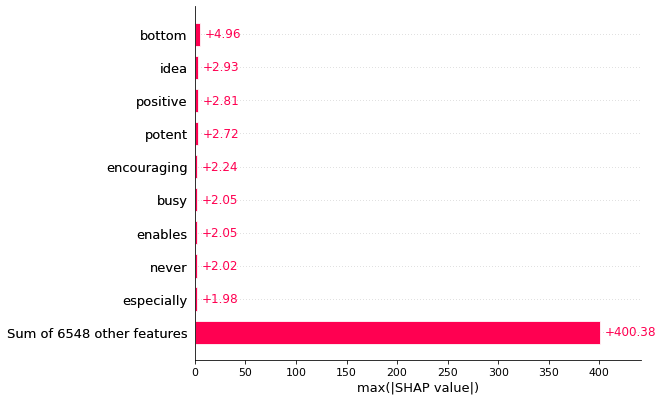

In [14]:
shap.plots.bar(shap_values.abs.max(0))